Other plot types
================

In our previous lessons, we've covered plot types that are often used 
in physics to present data. You should now have a general understanding 
of how to create figures using matplotlib and that should make it relatively 
easy to understand how to branch out and make other types of figures. So, 
let's take a look at some other plot types that are commonly used in physics.
Many of the tools that we've learned about regarding manipulating and controlling plots work 
with the plot types discussed here.

**Acknowledgement**: Data in this lesson was pulled from the [Quantitative Environmental Learning Project](https://seattlecentral.edu/qelp/Data_MathTopics.html) at Seatlle Central College.

Log plot
--------

In our lesson on line plots, each example utilized two linear axes. Of course we may want to visualize some data using a semilog or log-log set of axes. Pyplot accomplishes this with different plotting functions. Here, I'll plot the Yellowstone buffalo population as a function of time during the beginning of the 20th century.

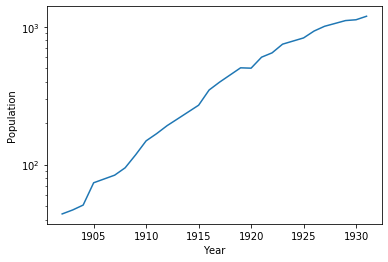

In [1]:
from matplotlib import pyplot as pp

year = [1902,1903,1904,1905,1907,1908,1909,1910,1911,1912,1913,1915,1916,1917,1919,1920,1921,1922,1923,1925,1926,1927,1928,1929,1930,1931]
count = [44,47,51,74,84,95,118,149,168,192,215,270,348,397,504,501,602,647,748,830,931,1008,1057,1109,1124,1192]

pp.semilogy(year,count)
pp.xlabel('Year')
pp.ylabel('Population')
pp.show()

The pyplot functions `semilogy()`, `semilogx()`, and `loglog()` all work similarly to `plot()` but give you access to the 3 types of log plots. 

Scatter plot
------------

Scatter plots are useful when we want to highlight a correlation between two variables in a dataset. Scatter plots are used differently than line plots, where our function tends 
to be single valued for all values of the independent variable. Instead, scatter can be used when two variables are independent. As an example, suppose we wanted to see if there was a relationship between the number of days of ice at a particular station on Lake Superior and the mean winter temperature for that season:

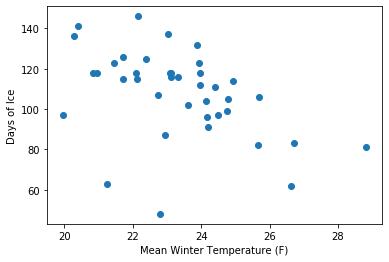

In [2]:
meanTemp = [22.94,23.02,25.68,19.96,24.8,23.98,22.1,20.3,24.2,22.74,24.16,24.94,22.4,22.14,20.84,25.66,21.73,24.49,24.13,22.17,21.73,20.41,24.41,23.95,20.95,26.71,22.81,23.11,23.33,28.83,23.11,21.47,23.97,24.75,23.61,23.08,21.24,26.63,23.88]
iceDays = [87,137,106,97,105,118,118,136,91,107,96,114,125,115,118,82,115,97,104,146,126,141,111,123,118,83,48,118,116,81,116,123,112,99,102,118,63,62,132]

pp.scatter(meanTemp,iceDays)
pp.xlabel("Mean Winter Temperature (F)")
pp.ylabel("Days of Ice")
pp.show()

A line plot wouldn't make sense here because, while there may be a trend, there is no explicit functional relationship between the two variables. Scatter plots like this can help us visualize trends in real data while not leading the reader to wrongly believe that there exists a specific functional relationship.

Histograms
----------

Pyplot has built in tools to make creating histograms easy from a dataset. The usage is a little bit unintuitive, but for good reason. In order to create a 
histogram, we first have to create an axis object. Then, we use the `hist()` method of that object to create the data for the histogram and draw it. Let's take a look at an example using observations of Atlantic hurricanes from 1851 - 2000. In this dataset, there are 755 hurricane observations for which I only care about the week in the hurricane season that a particular hurricane began. So the dataset contains 1 date for each hurricane where the date is written in terms of the week number of the hurricane season, which begins on June 1 of each year. So, week 1 corresponds to the first week of June and so on.

Since there are so many measurements, they have been placed in a csv that can be quickly read.

In [3]:
import csv

data = []
with open('hurricane.csv',encoding='utf-8-sig') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    data = [int(row[0]) for row in csv_reader]

print(data[0:10])

[5, 11, 12, 14, 15, 17, 19, 13, 15, 17]


Again, each data point corresponds to a week number. 

Now, we will use the histogram tools to create our histogram. A histogram shows 
the number of counts or occurances of some value as a function of those values. In order to make a histogram work, we need to "bin" the data. In this example, I want to show the number of hurricanes that occurred for each 2 week bin during the hurricane season starting at week 1 and running through week 32- thus there should be 16 bins. Python makes this easy.

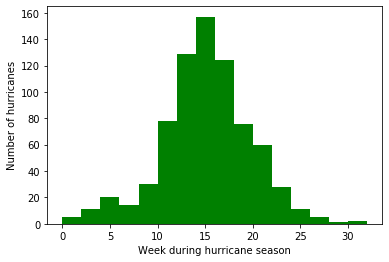

In [4]:
fig, ax = pp.subplots()
nbins = 16
n, bins, patches = ax.hist(data, nbins,range=(0,32),color="green")

ax.set_xlabel("Week during hurricane season")
ax.set_ylabel("Number of hurricanes")
pp.show()

Quiver plot
-----------

In physics, we often deal with vector fields- a set of vectors that are defined at all points in space. Gravitaional fields, electric and magnetic fields are all examples of vector fields that we encounter throughout the physics curriculum. In this way, a vector field is often visualized using a quiver plot, where we plot 
the vector magnitude and direction at all points in the x-y plane (for a 2D field). This is relatively easy to do in pyplot with the `quiver()` function.
Here, I'll plot the x and z components of the gravitational field (acceleration) around the Earth.

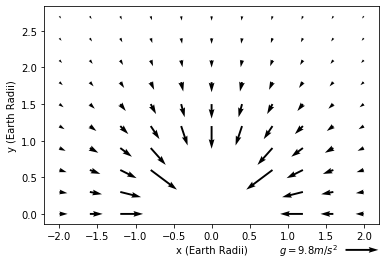

In [10]:
import numpy as np 

# constants: radius, mass, G
rE = 6378e3       #m
mE = 5.972e24     #kg
G = 6.67e-11       #Nm^2/kg^2

# Create my grid
x = np.arange(-2,2.4,.4)
z = np.arange(0,3,.3)
X,Z = np.meshgrid(x,z)

#use vector operations to calculate distance from 
#all points to center of Earth
r = ((X*rE)**2 + (Z*rE)**2)**.5

#Calculate acceleration due to gravity
ax = -G*mE*X*rE/(r**3)
az = -G*mE*Z*rE/(r**3)

#Mask values inside the Earth (where g > 9.81)
mag = np.sqrt(ax**2+az**2)
ax = np.ma.masked_where(abs(mag) > 9.81, ax)
az = np.ma.masked_where(abs(mag) > 9.81, az)

#make my quiver plot and add a key
q = pp.quiver(X,Z,ax,az,scale=100)
qk = pp.quiverkey(q,.9,-.12,9.8,r'$g = 9.8m/s^2$',labelpos='W')
pp.xlabel('x (Earth Radii)')
pp.ylabel('y (Earth Radii)')
pp.show()


The `quiver()` function generally takes 4 arguments: the x and y positions of each quiver and the x and y components of each quiver. In my example, I use the 2D arrays `X` and `Z` to describe the positions and `ax` and `az` to describe the components. Also, because I don't want to show quivers inside the Earth, I use one of numpy's mask functions, in this case `masked_where()` which essentially removes all values in our array that are too large. There are a variety of these tools in the `ma` (masked array) submodule.

`quiver()` will try to autoscale the arrows based on some algorithm, but that doesn't work with data that goes as $1/r^2$, so I use the `scale` keyword to compress the arrow scale so they look reasonable. As always, the details can be found in the [matplotlib docs](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html). Dealing with scaling the arrows can make it tricky to work quiver plots and often requires some trial and error.